In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/hotel_bookings 2 - hotel_bookings 2.csv')

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340

In [ ]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                  

In [ ]:
missing_threshold = 0.5
df = df.loc[:, df.isnull().mean() < missing_threshold]

In [ ]:
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)

<ipython-input-10-652d56473c61>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [ ]:
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-11-557a9f41b221>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


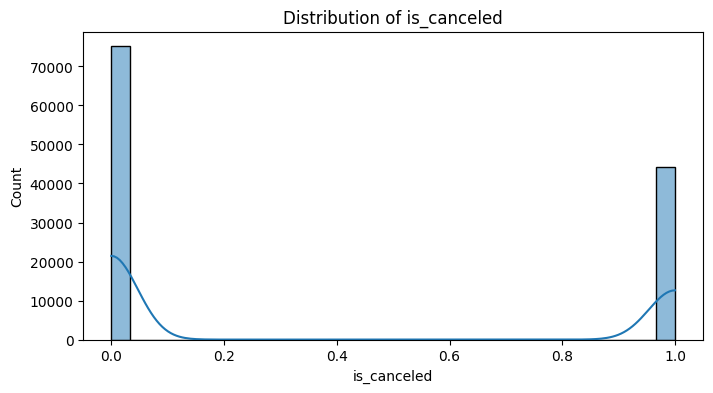

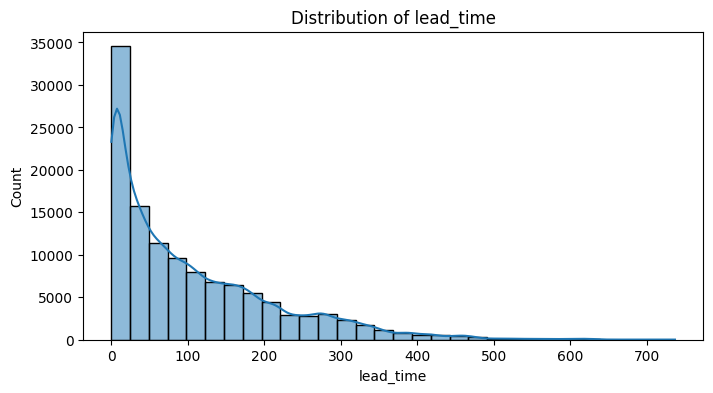

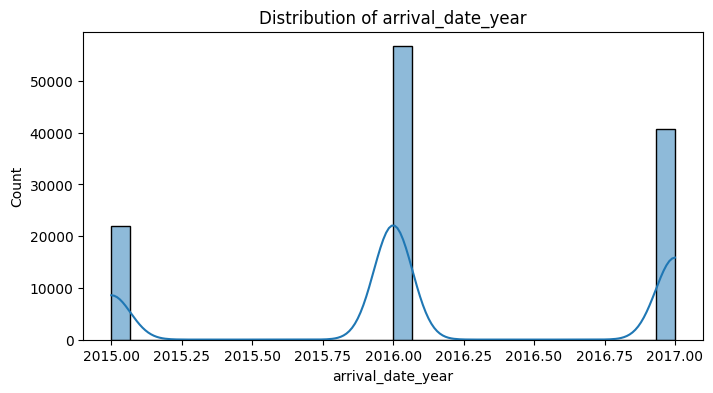

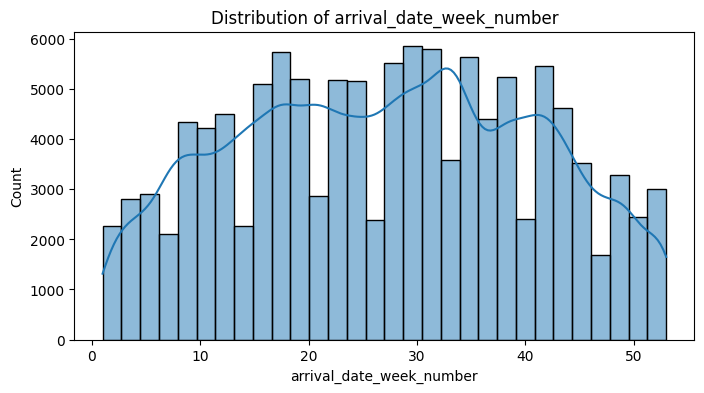

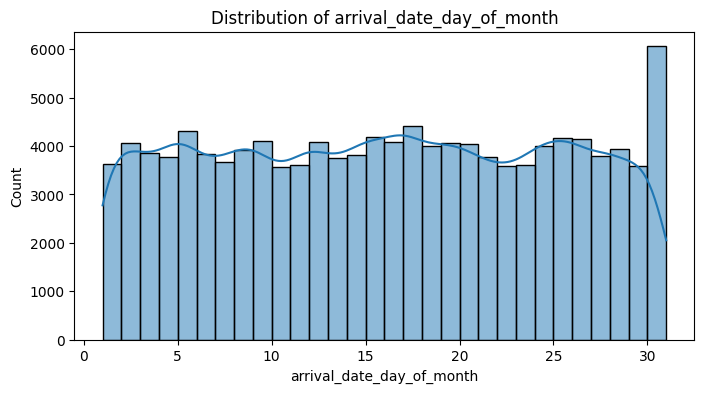

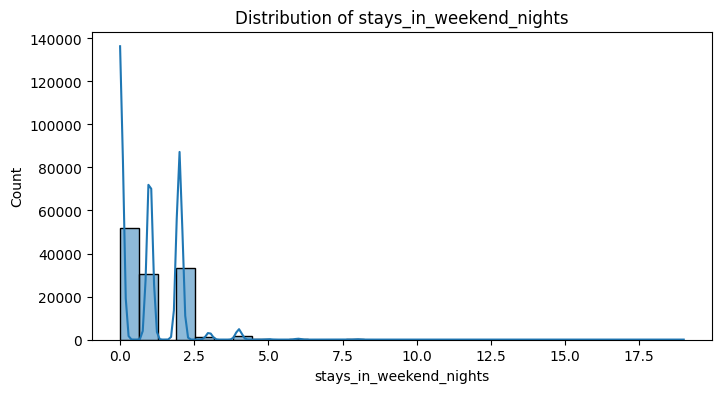

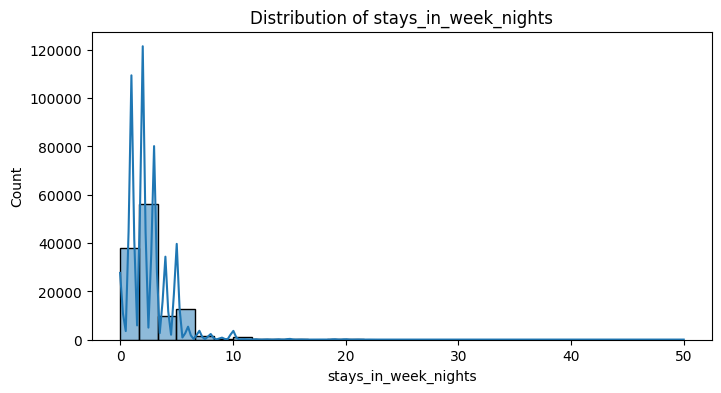

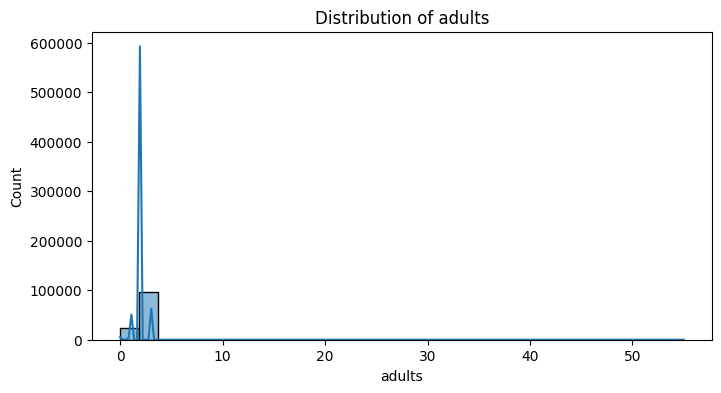

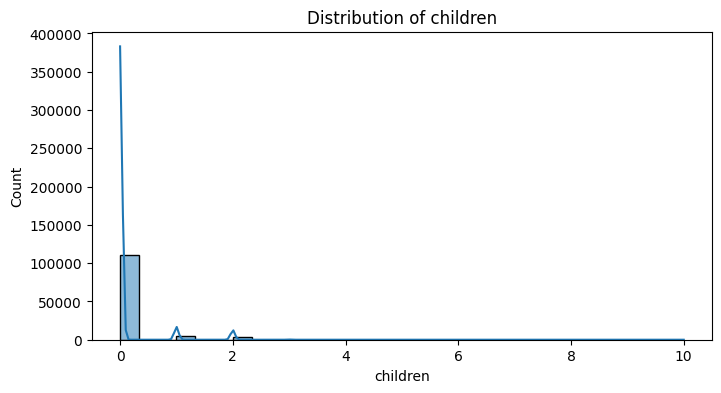

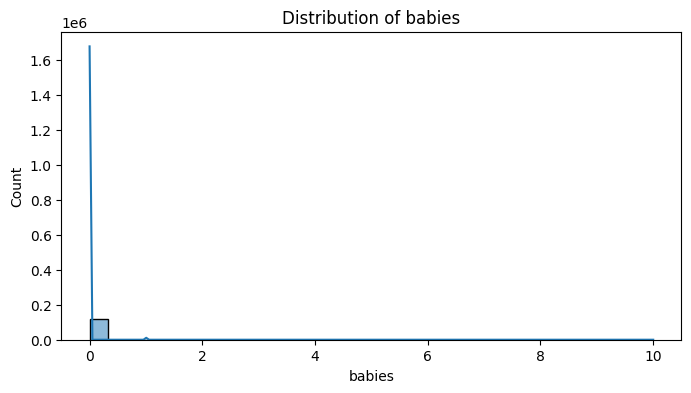

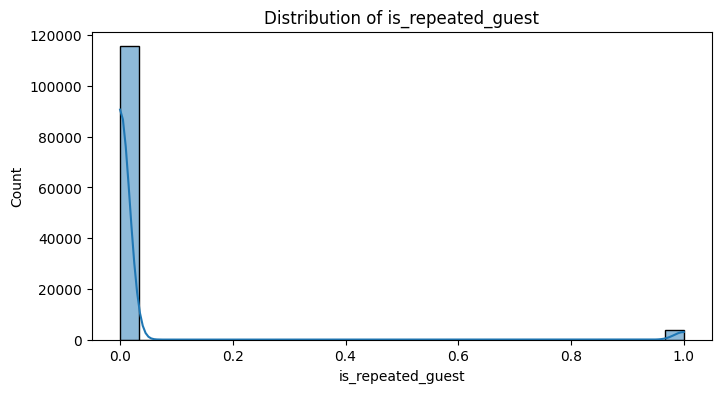

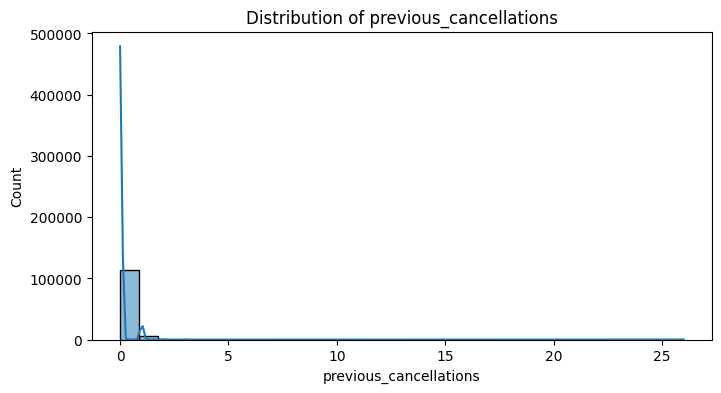

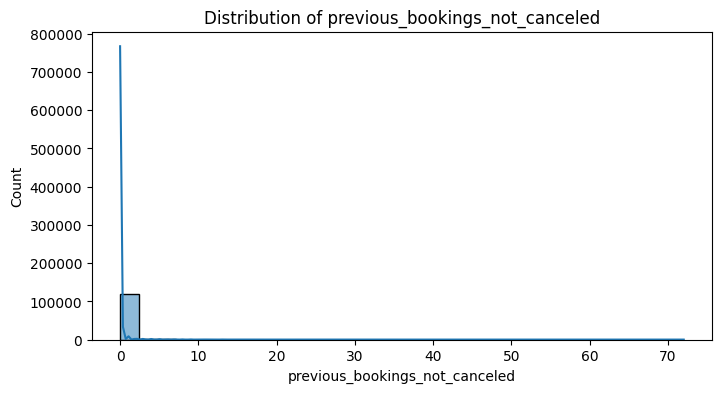

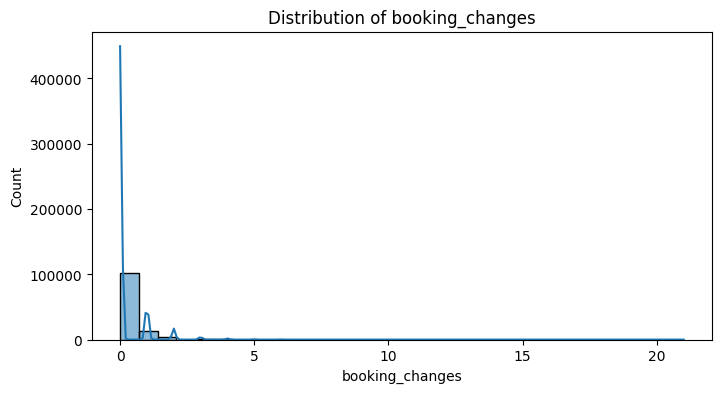

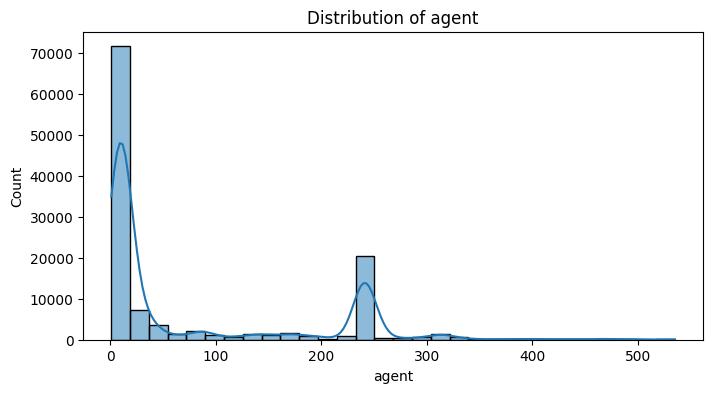

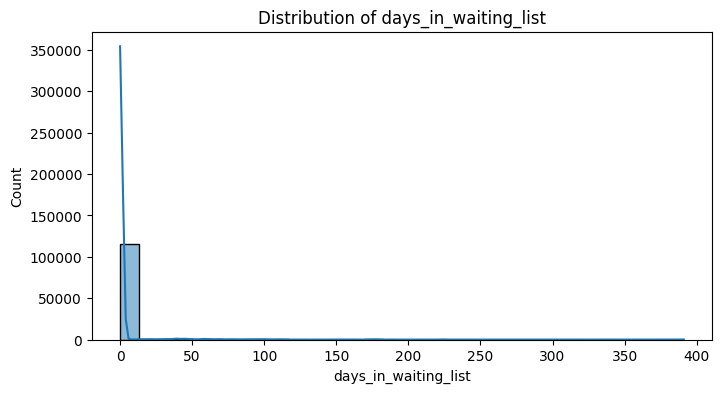

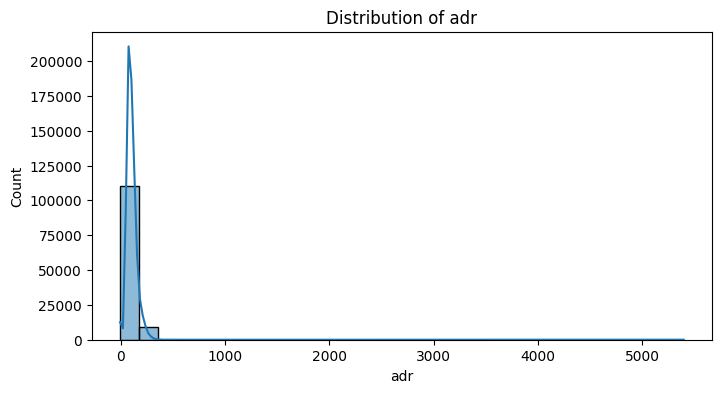

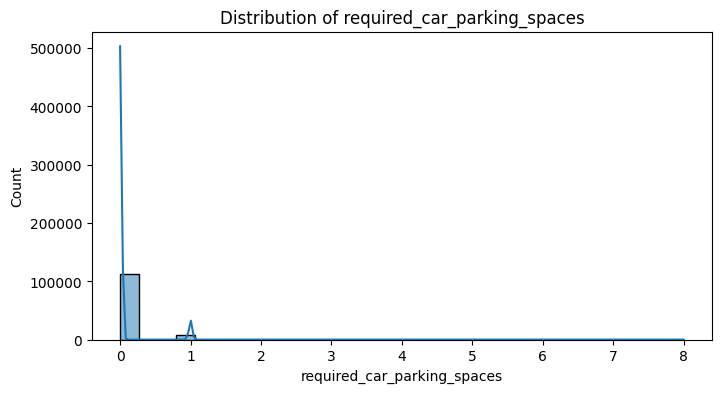

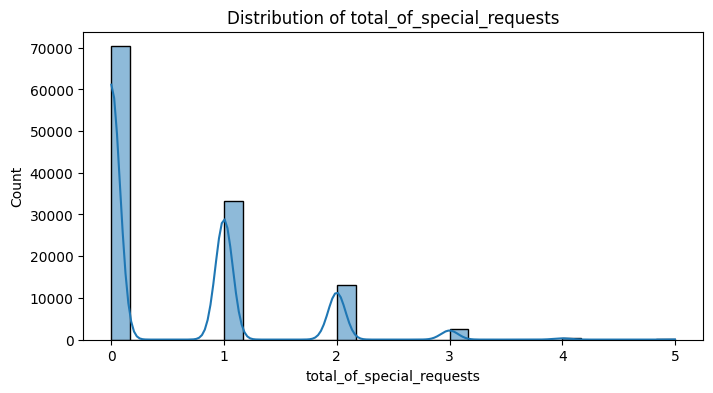

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# prompt: create code for catagorical features

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Iterate through categorical columns
for col in categorical_cols:
    print(f"Categorical Column: {col}")
    print(df[col].value_counts())  # Display value counts for each category

    # Example: One-hot encoding
    # one_hot = pd.get_dummies(df[col], prefix=col)
    # df = pd.concat([df, one_hot], axis=1)
    # df.drop(col, axis=1, inplace=True)

    # Example: Label encoding
    # from sklearn.preprocessing import LabelEncoder
    # le = LabelEncoder()
    # df[col] = le.fit_transform(df[col])

    print("-" * 20) #separator between features

# Display updated DataFrame info
df.info()

Categorical Column: hotel
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
--------------------
Categorical Column: arrival_date_month
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64
--------------------
Categorical Column: meal
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
--------------------
Categorical Column: country
country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64
--------------------
Categorical Column: market_segment
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct        

Percentage of Cancelled Bookings: 37.04%


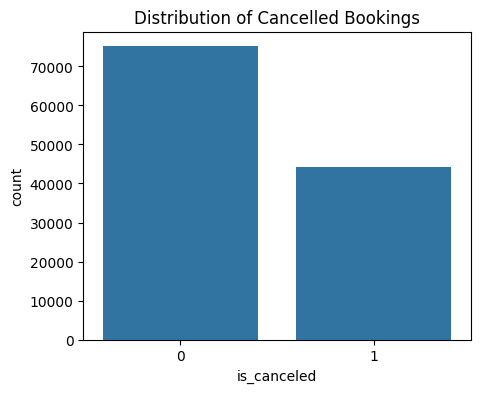

In [ ]:
cancelled_percentage = df['is_canceled'].mean() * 100
print(f"Percentage of Cancelled Bookings: {cancelled_percentage:.2f}%")

plt.figure(figsize=(5, 4))
sns.countplot(x='is_canceled', data=df)
plt.title("Distribution of Cancelled Bookings")
plt.show()



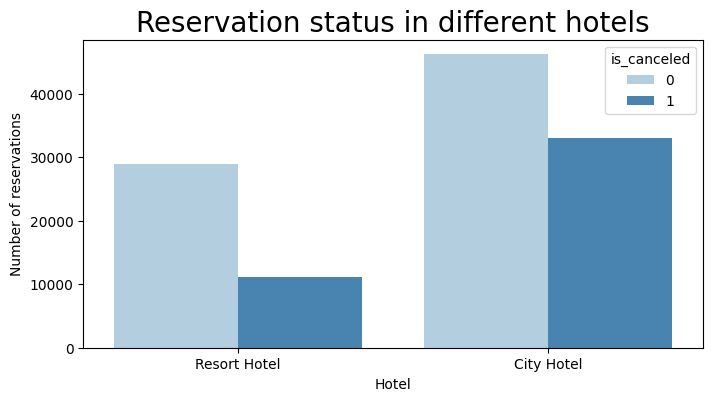

In [ ]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Blues')
legend_labels, _ = ax1.get_legend_handles_labels()
##ax1.legend(bbox_to_anchor(1,1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')
plt.show()

In [ ]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize= True)

,proportion
is_canceled,
0,0.722366
1,0.277634


In [ ]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize= True)

,proportion
is_canceled,
0,0.58273
1,0.41727


In [ ]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [ ]:
resort_hotel.reset_index()

,reservation_status_date,adr
0,1/1/2015,61.966667
1,1/1/2016,122.366111
2,1/1/2017,200.999714
3,1/10/2015,66.102667
4,1/10/2016,103.119286
...,...,...
908,9/8/2016,187.970000
909,9/8/2017,223.363143
910,9/9/2015,99.663889
911,9/9/2016,101.520244


In [ ]:
def get_month(date):
    a = date.split('/')
    return a[0]+'-'+a[2]
resort_hotel=resort_hotel.reset_index()
city_hotel=city_hotel.reset_index()
resort_hotel['reservation_status_date'] = resort_hotel['reservation_status_date'].apply(get_month)
city_hotel['reservation_status_date'] = city_hotel['reservation_status_date'].apply(get_month)

In [ ]:
resort_hotel.head()
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

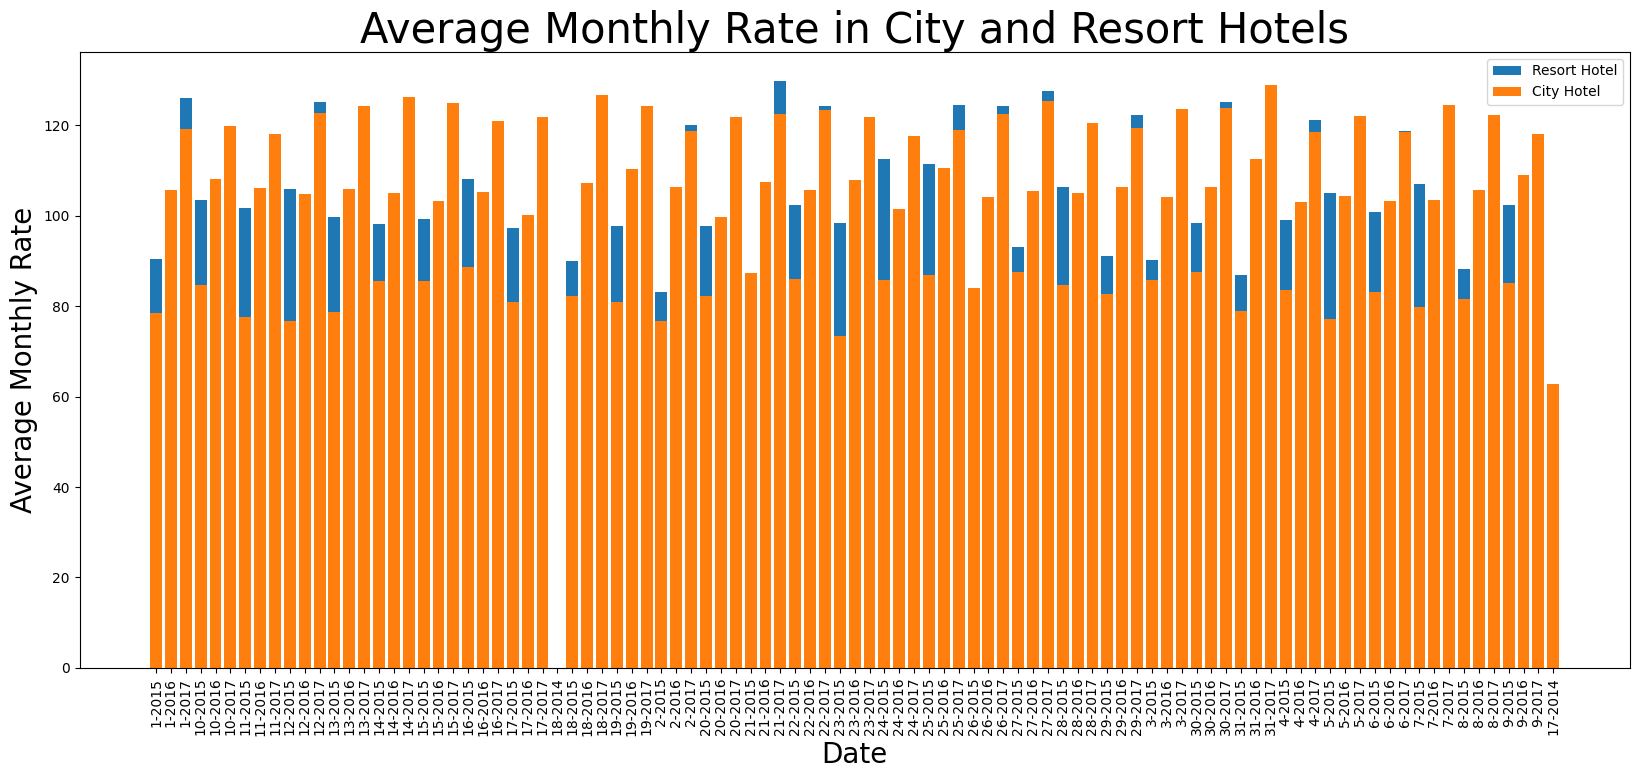

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Average Monthly Rate in City and Resort Hotels', fontsize = 30)
plt.bar(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.bar(city_hotel.index, city_hotel['adr'], label='City Hotel')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Monthly Rate', fontsize = 20)
plt.legend()
plt.xticks(rotation=90)
plt.show()

<ipython-input-42-eca42cc27aa8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='hotel', palette='pastel')


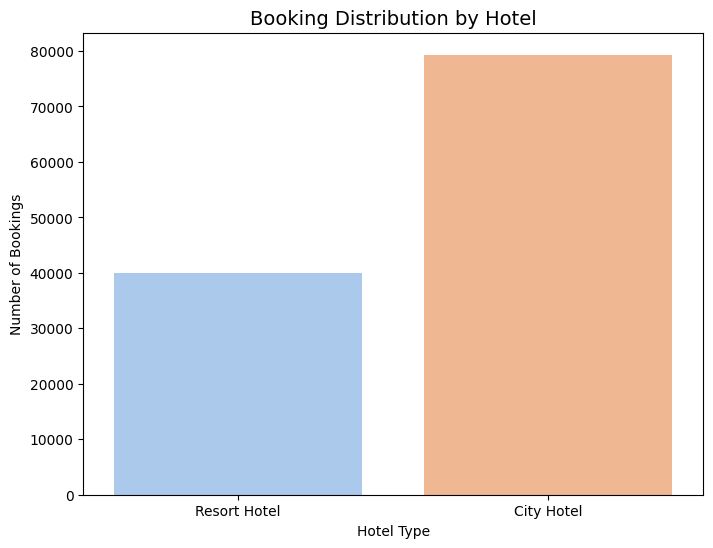

In [ ]:
## Booking distribution across hotels
plt.figure(figsize=(8, 6))
sns.countplot(data= df, x='hotel', palette='pastel')
plt.title('Booking Distribution by Hotel', fontsize=14)
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

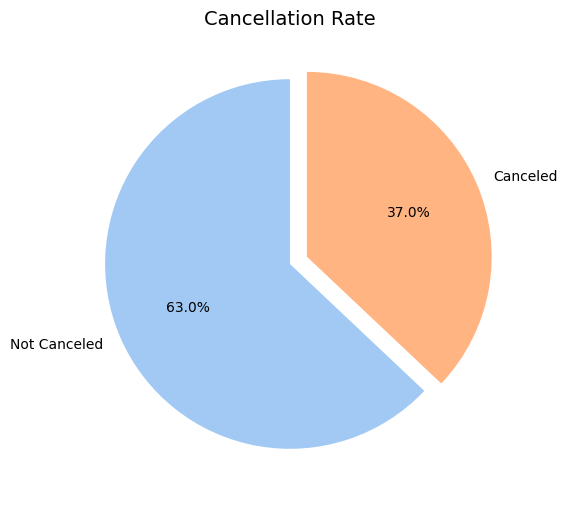

In [ ]:
##Canceled vs Non-Canceled Bookings
cancellation_counts = df['is_canceled'].value_counts()
labels = ['Not Canceled', 'Canceled']
colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 6))
plt.pie(cancellation_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0, 0.1))
plt.title('Cancellation Rate', fontsize=14)
plt.show()

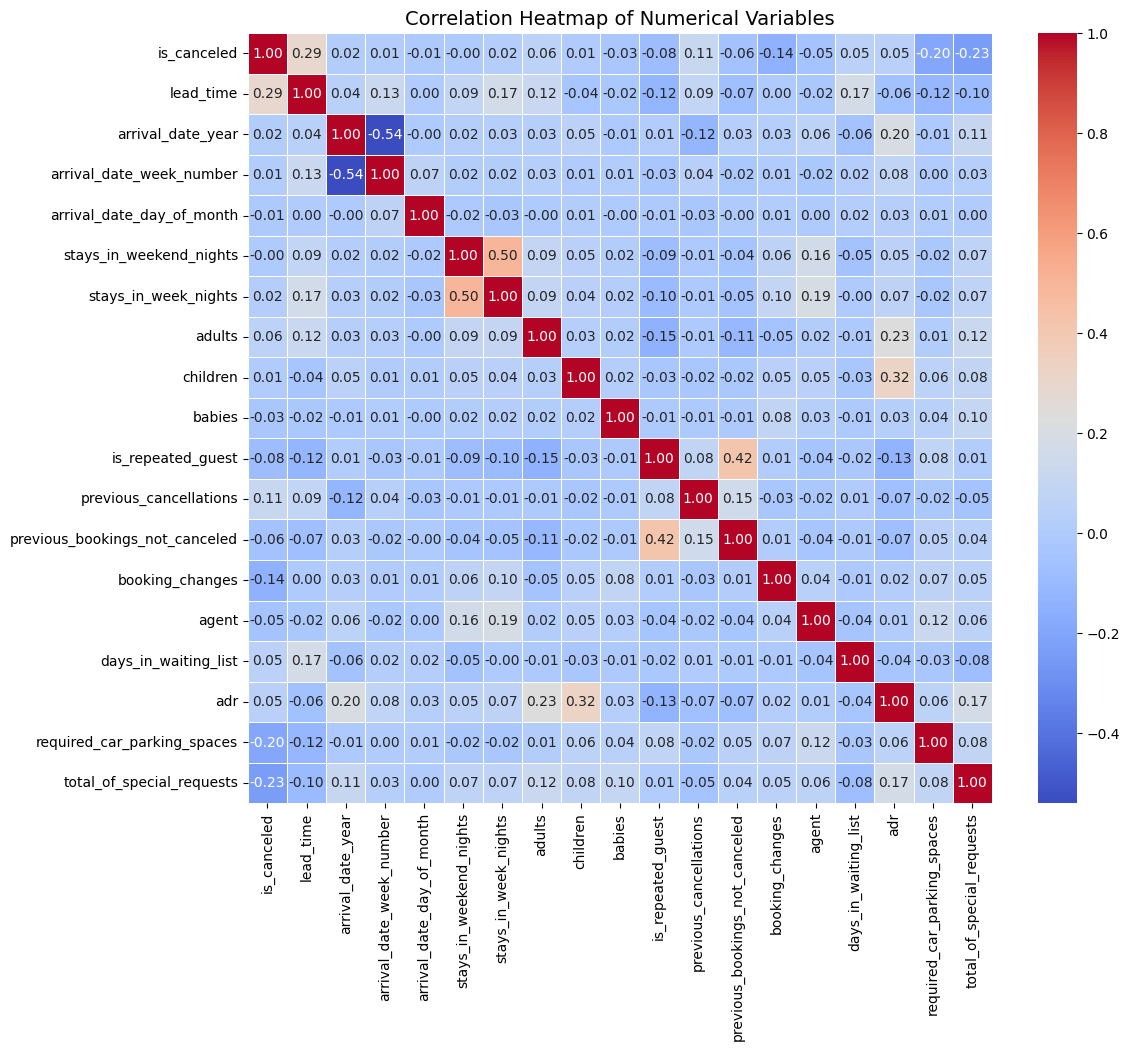

In [ ]:
##Numerical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14)
plt.show()

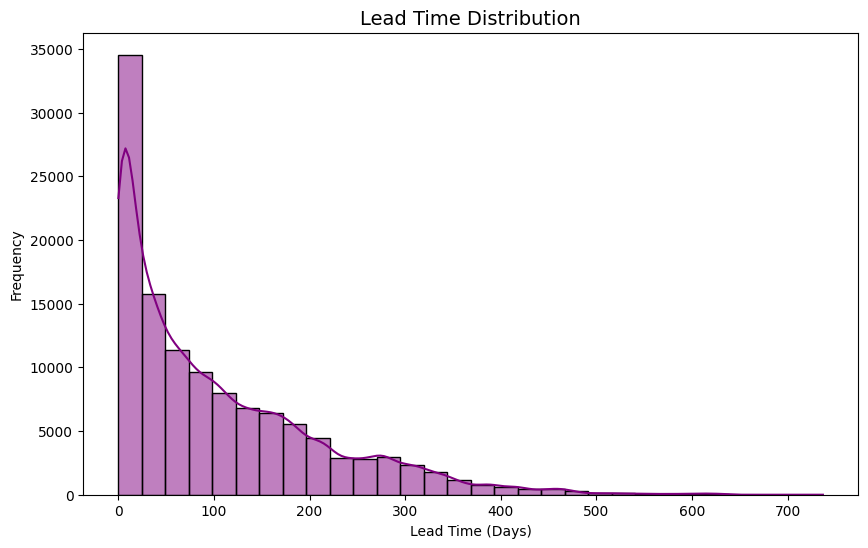

In [ ]:
##Distribution of Lead Times
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], kde=True, color='purple', bins=30)
plt.title('Lead Time Distribution', fontsize=14)
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

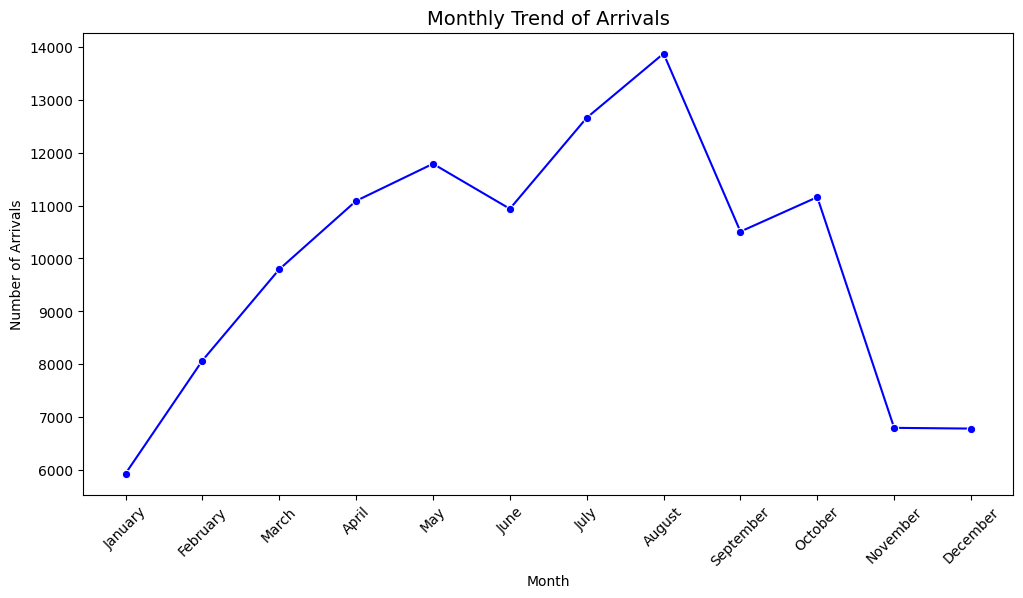

In [ ]:
## Monthly trend of arrivals
monthly_arrivals = df.groupby('arrival_date_month').size().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_arrivals.index, y=monthly_arrivals.values, marker='o', color='blue')
plt.title('Monthly Trend of Arrivals', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.show()

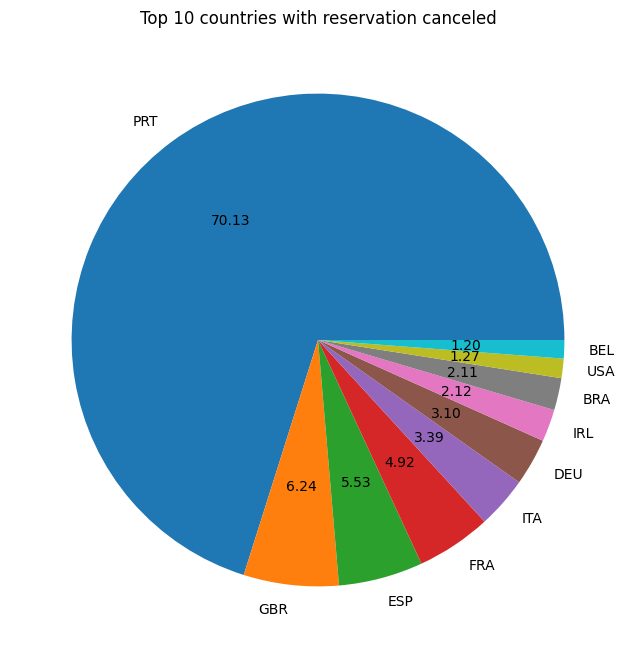

In [ ]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize =(8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

<ipython-input-47-95ce82bdba0d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='customer_type', palette='pastel', order=df['customer_type'].value_counts().index)


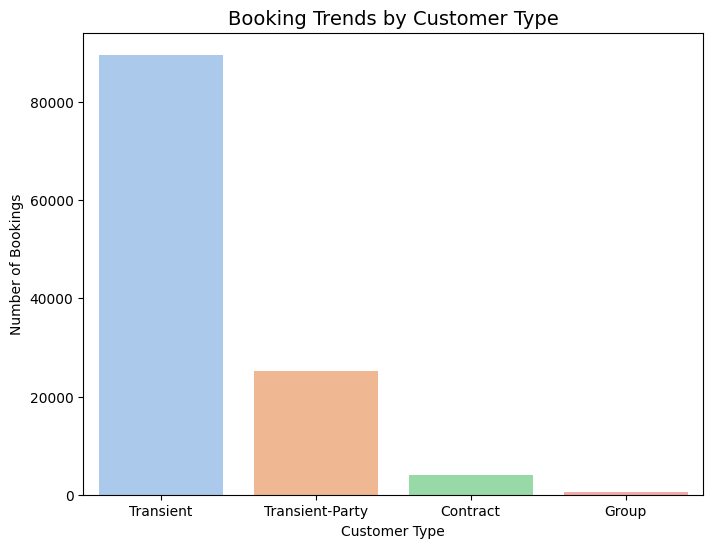

In [ ]:
##Booking Trends by Customer Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='customer_type', palette='pastel', order=df['customer_type'].value_counts().index)
plt.title('Booking Trends by Customer Type', fontsize=14)
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.show()

<ipython-input-48-4bce8fcaf93c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='reserved_room_type', label='Reserved', palette='Blues', alpha=0.7)
<ipython-input-48-4bce8fcaf93c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='assigned_room_type', label='Assigned', palette='Oranges', alpha=0.7)


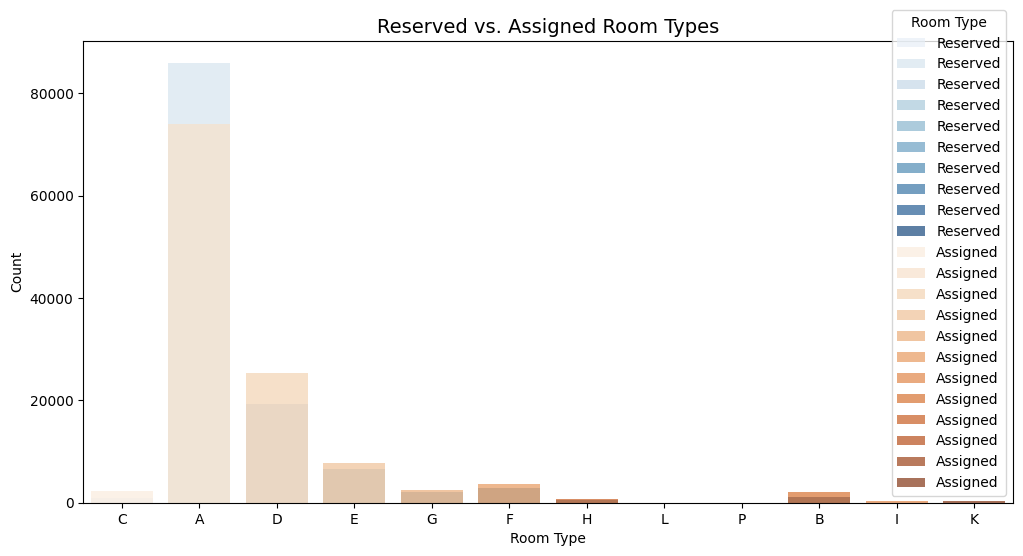

In [ ]:
##Room Preference Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='reserved_room_type', label='Reserved', palette='Blues', alpha=0.7)
sns.countplot(data=df, x='assigned_room_type', label='Assigned', palette='Oranges', alpha=0.7)
plt.title('Reserved vs. Assigned Room Types', fontsize=14)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Room Type')
plt.show()



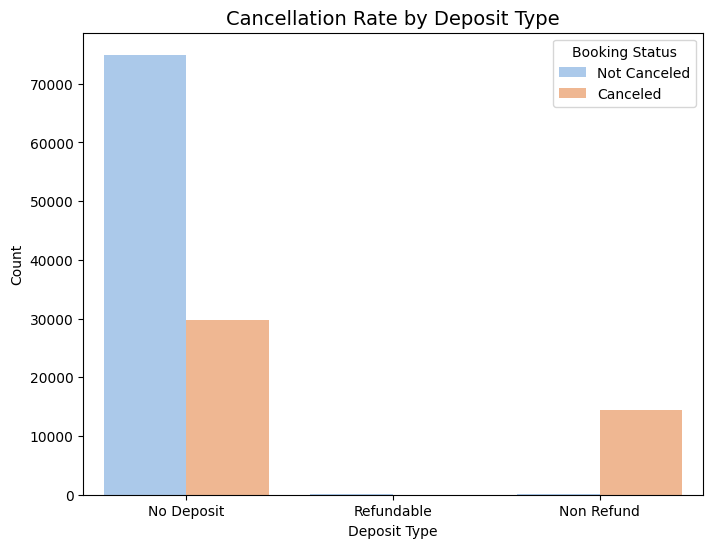

In [ ]:
##Cancellation Rate by Deposit Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='deposit_type', hue='is_canceled', palette='pastel')
plt.title('Cancellation Rate by Deposit Type', fontsize=14)
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

<ipython-input-50-5b92b9d14eaa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='market_segment', palette='pastel', order=df['market_segment'].value_counts().index)


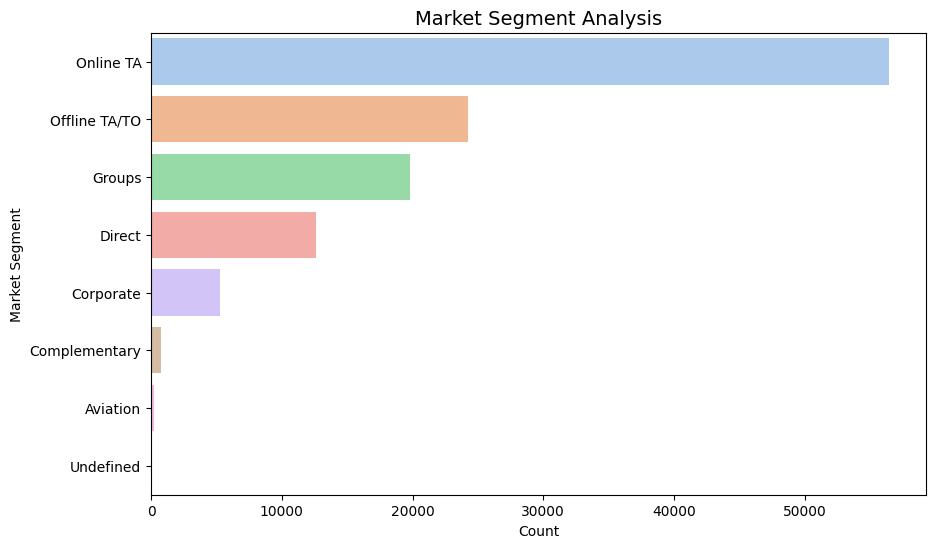

In [ ]:
##Market Segment Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='market_segment', palette='pastel', order=df['market_segment'].value_counts().index)
plt.title('Market Segment Analysis', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Market Segment')
plt.show()


<ipython-input-69-34990f1b9390>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='is_canceled', y='total_of_special_requests', palette='pastel')


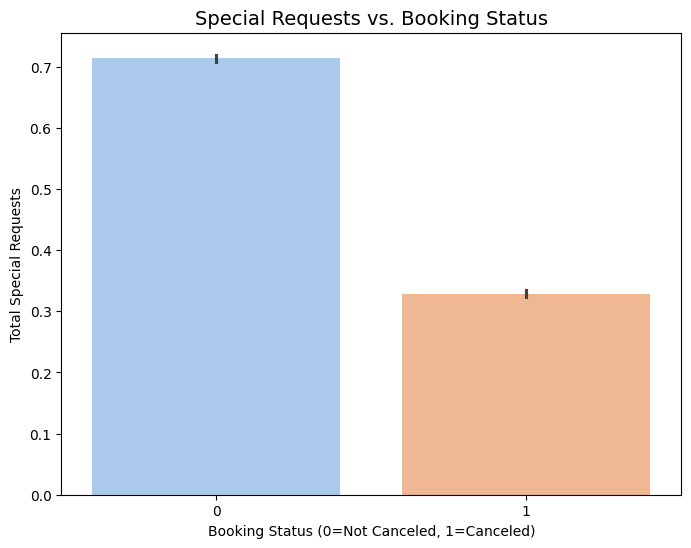

In [ ]:
##Special Requests vs. Booking Status
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='is_canceled', y='total_of_special_requests', palette='pastel')
plt.title('Special Requests vs. Booking Status', fontsize=14)
plt.xlabel('Booking Status (0=Not Canceled, 1=Canceled)')
plt.ylabel('Total Special Requests')
plt.show()


<ipython-input-70-2e59a76bf147>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='hotel', y='lead_time', palette='pastel')


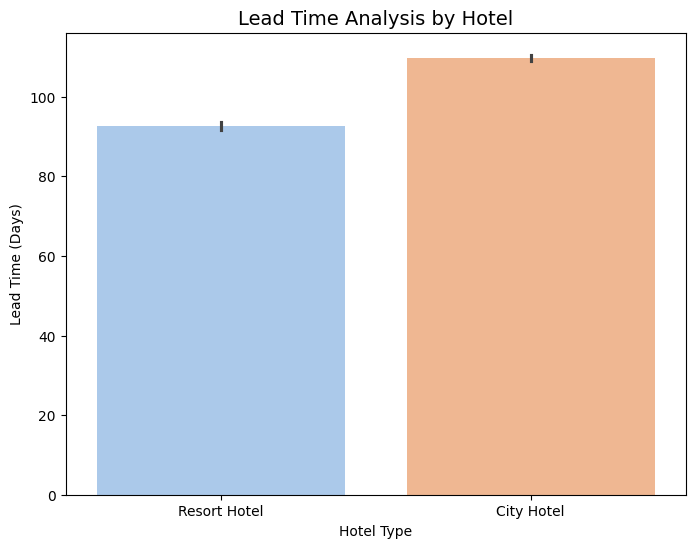

In [ ]:
##Lead Time Analysis by Hotel
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='hotel', y='lead_time', palette='pastel')
plt.title('Lead Time Analysis by Hotel', fontsize=14)
plt.xlabel('Hotel Type')
plt.ylabel('Lead Time (Days)')
plt.show()

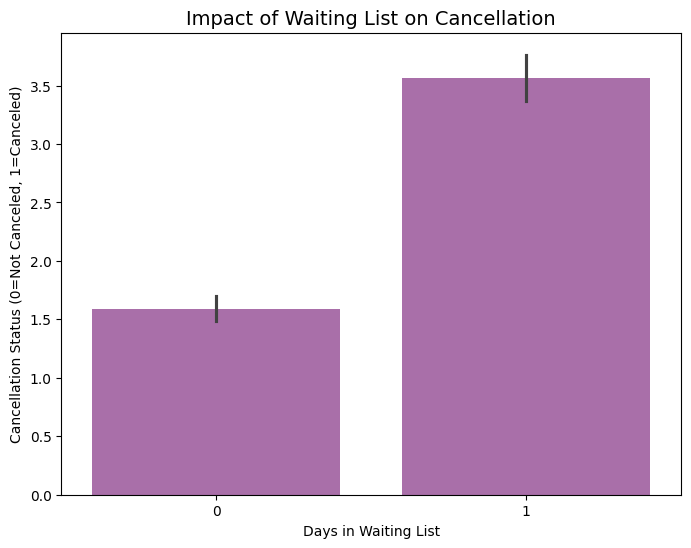

In [ ]:
##Impact of Waiting List
plt.figure(figsize=(8, 6))
sns.barplot(data=df, y ='days_in_waiting_list', x ='is_canceled', alpha=0.6, color='purple')
plt.title('Impact of Waiting List on Cancellation', fontsize=14)
plt.xlabel('Days in Waiting List')
plt.ylabel('Cancellation Status (0=Not Canceled, 1=Canceled)')
plt.show()

<ipython-input-54-7231690a6ceb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='pastel')


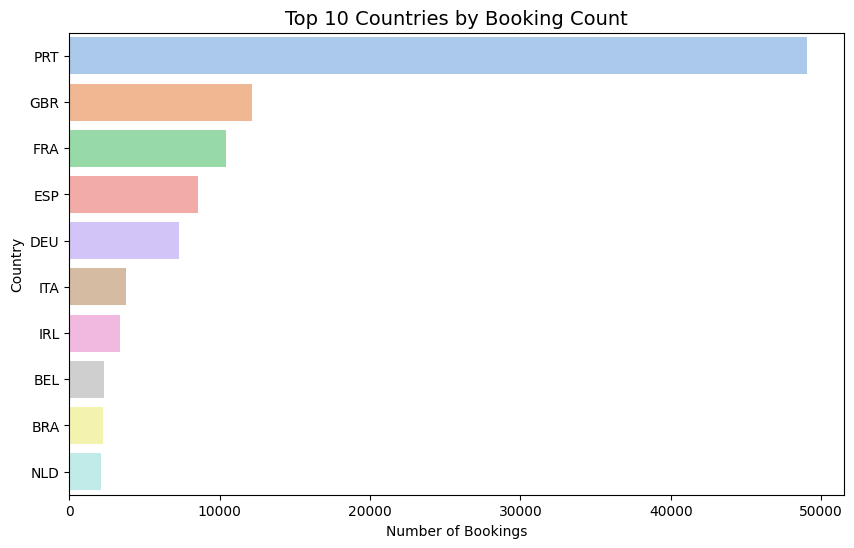

In [ ]:
##Country-wise Booking Trends
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='pastel')
plt.title('Top 10 Countries by Booking Count', fontsize=14)
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.show()

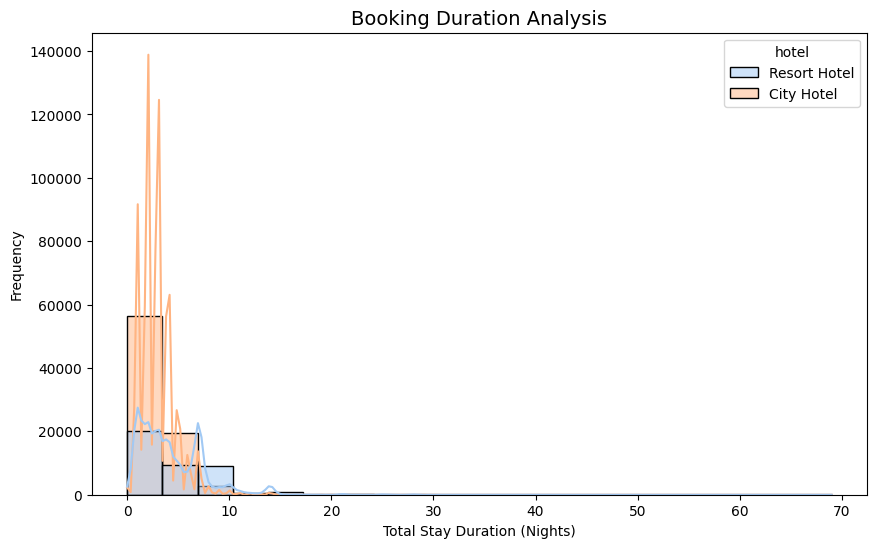

In [ ]:
##Booking Duration Analysis
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
plt.figure(figsize=(10, 6))
sns.histplot(df, x='total_stay', hue='hotel', kde=True, palette='pastel', bins=20)
plt.title('Booking Duration Analysis', fontsize=14)
plt.xlabel('Total Stay Duration (Nights)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-60-a47bbf421664>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_agents.values, y=top_agents.index, palette='pastel')


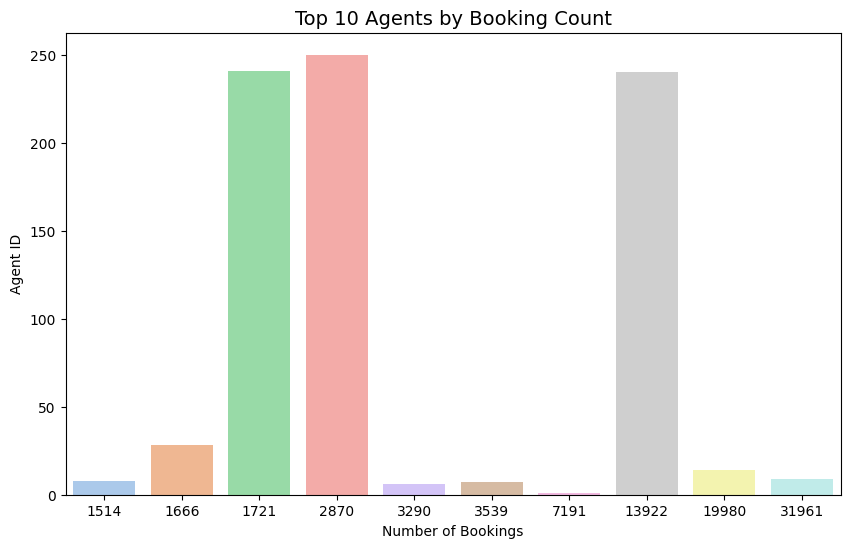

In [ ]:
##Agent Performance
top_agents = df['agent'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_agents.values, y=top_agents.index, palette='pastel')
plt.title('Top 10 Agents by Booking Count', fontsize=14)
plt.xlabel('Number of Bookings')
plt.ylabel('Agent ID')
plt.show()

<ipython-input-61-328b89b626e7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_lead_time.values, y=market_lead_time.index, palette='pastel')


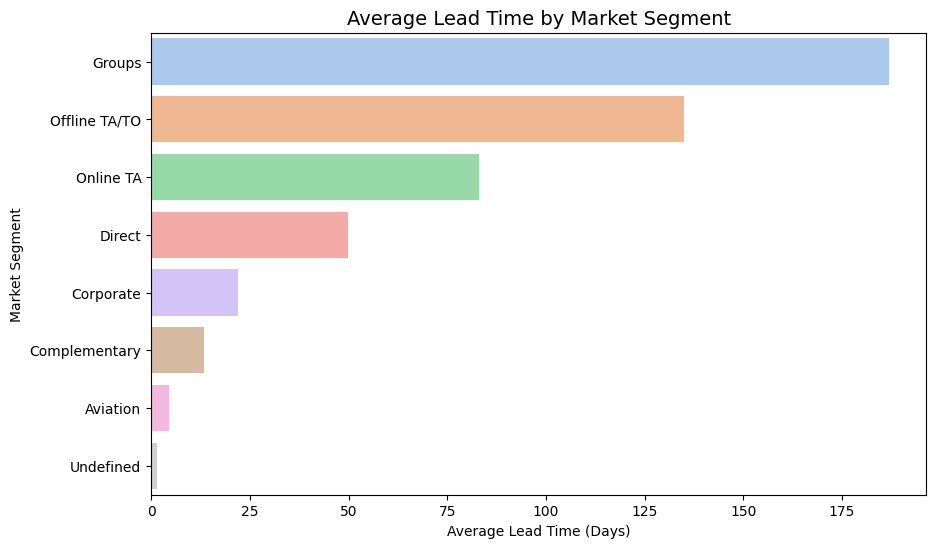

In [ ]:
##Average Lead Time by Market Segment
plt.figure(figsize=(10, 6))
market_lead_time = df.groupby('market_segment')['lead_time'].mean().sort_values(ascending=False)
sns.barplot(x=market_lead_time.values, y=market_lead_time.index, palette='pastel')
plt.title('Average Lead Time by Market Segment', fontsize=14)
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Market Segment')
plt.show()

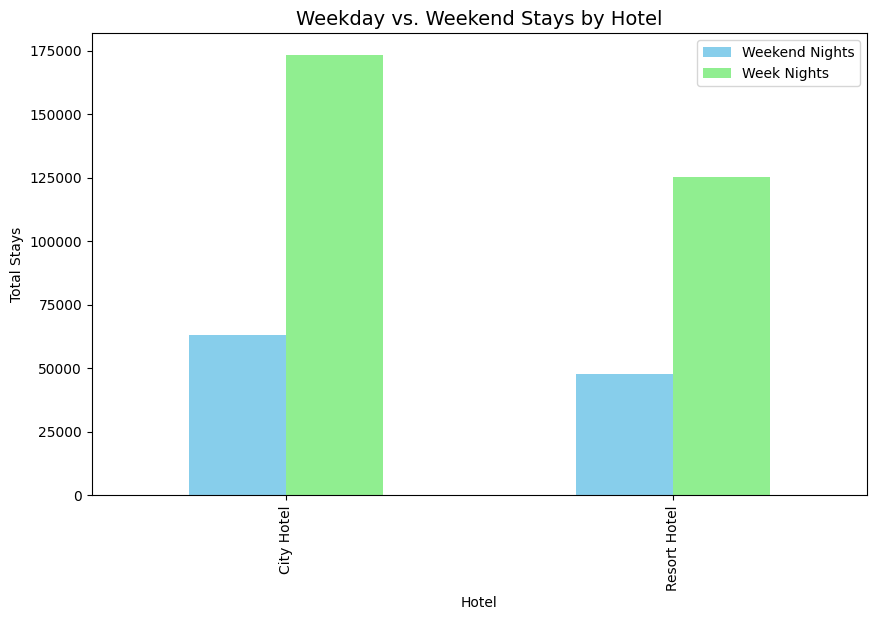

In [ ]:
##Weekday vs. Weekend Stays
stay_comparison = df.groupby('hotel')[['stays_in_weekend_nights', 'stays_in_week_nights']].sum()
stay_comparison.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Weekday vs. Weekend Stays by Hotel', fontsize=14)
plt.xlabel('Hotel')
plt.ylabel('Total Stays')
plt.legend(['Weekend Nights', 'Week Nights'])
plt.show()

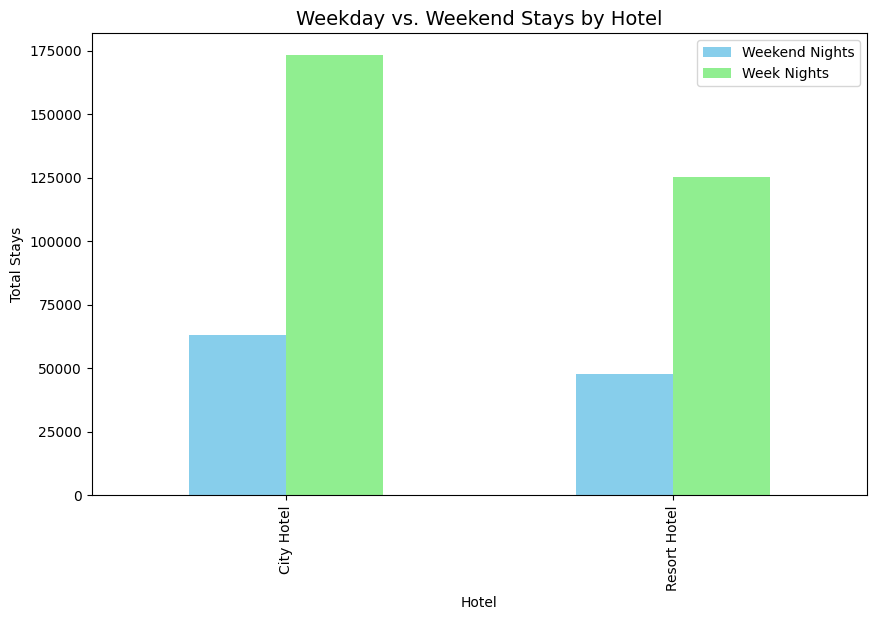

In [ ]:
##Weekday vs. Weekend Stays
stay_comparison = df.groupby('hotel')[['stays_in_weekend_nights', 'stays_in_week_nights']].sum()
stay_comparison.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Weekday vs. Weekend Stays by Hotel', fontsize=14)
plt.xlabel('Hotel')
plt.ylabel('Total Stays')
plt.legend(['Weekend Nights', 'Week Nights'])
plt.show()

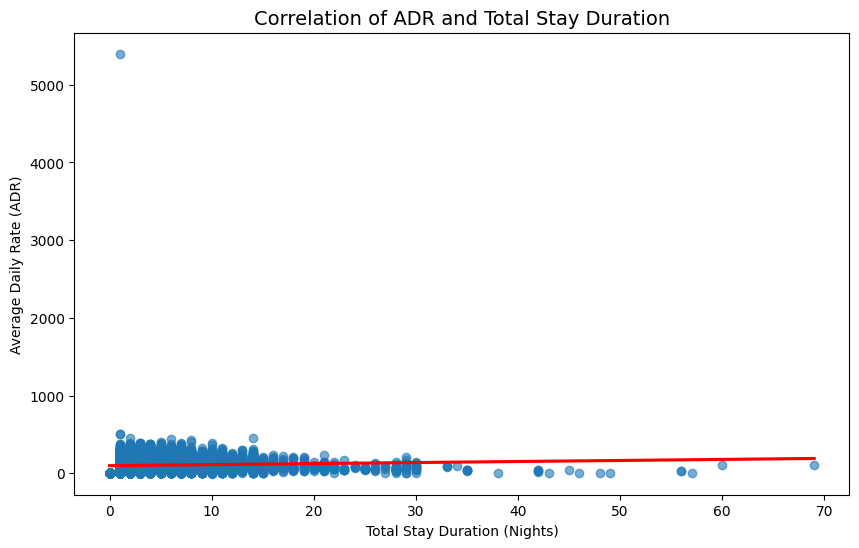

In [ ]:
##Correlation of ADR and Total Stay Duration
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='total_stay', y='adr', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Correlation of ADR and Total Stay Duration', fontsize=14)
plt.xlabel('Total Stay Duration (Nights)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

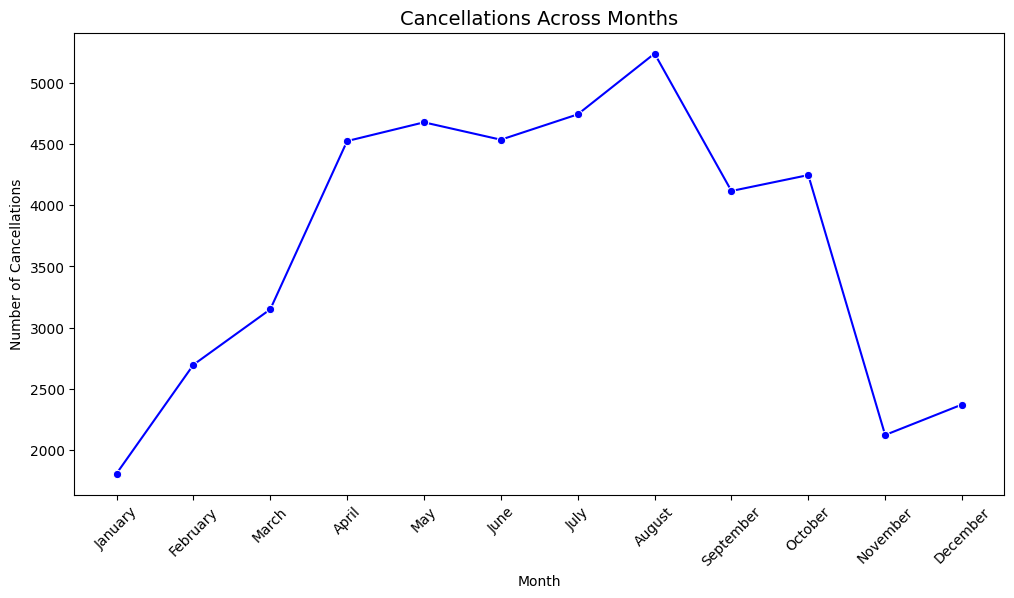

In [ ]:
##Booking Cancellation Across Months
monthly_cancellations = df[df['is_canceled'] == 1].groupby('arrival_date_month').size().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_cancellations.index, y=monthly_cancellations.values, marker='o', color='blue')
plt.title('Cancellations Across Months', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()

<ipython-input-85-5f6f4909087d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='market_segment', y='total_of_special_requests', palette='pastel')


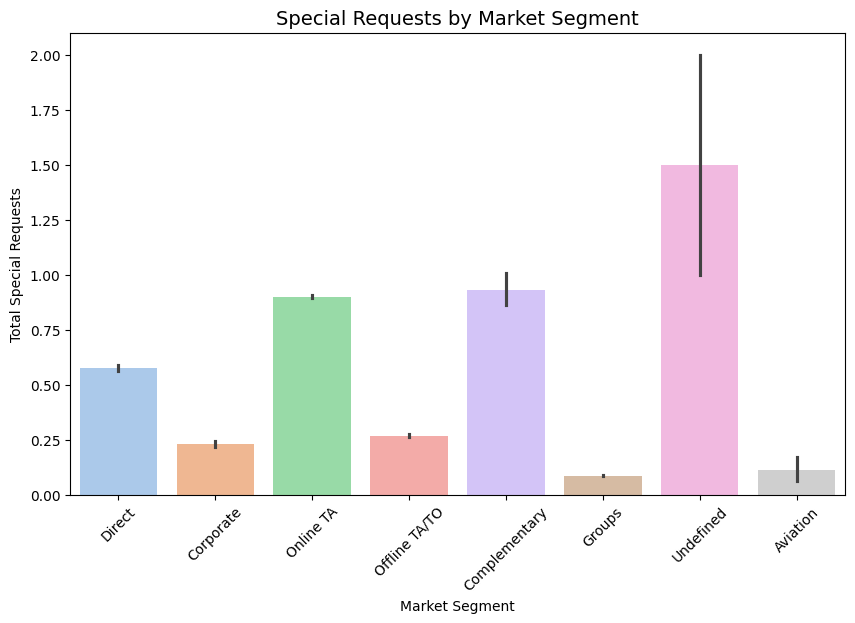

In [ ]:
##Special Requests by Market Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='market_segment', y='total_of_special_requests', palette='pastel')
plt.title('Special Requests by Market Segment', fontsize=14)
plt.xlabel('Market Segment')
plt.ylabel('Total Special Requests')
plt.xticks(rotation=45)
plt.show()

<ipython-input-67-cae717d733e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='reservation_status', y='adr', palette='pastel')


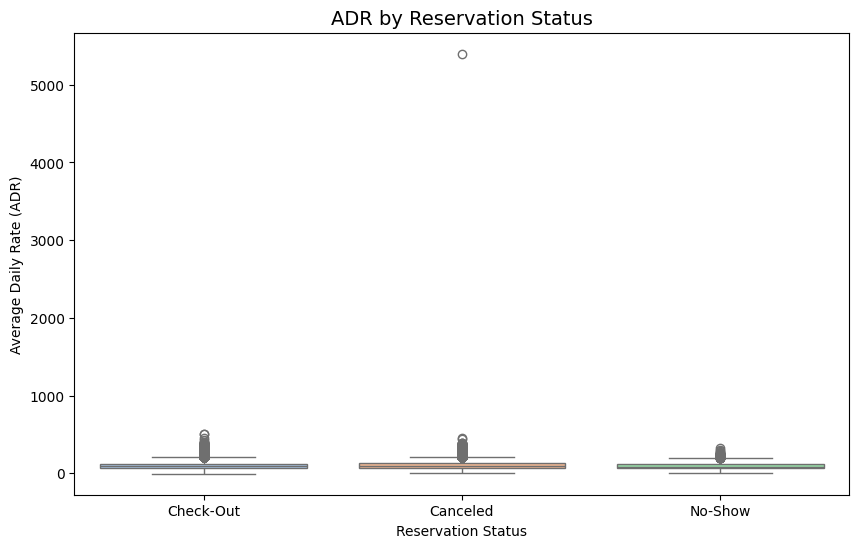

In [ ]:
##Revenue Comparison by Reservation Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='reservation_status', y='adr', palette='pastel')
plt.title('ADR by Reservation Status', fontsize=14)
plt.xlabel('Reservation Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

<ipython-input-68-425909af113b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=meal_preferences.values, y=meal_preferences.index, palette='pastel')


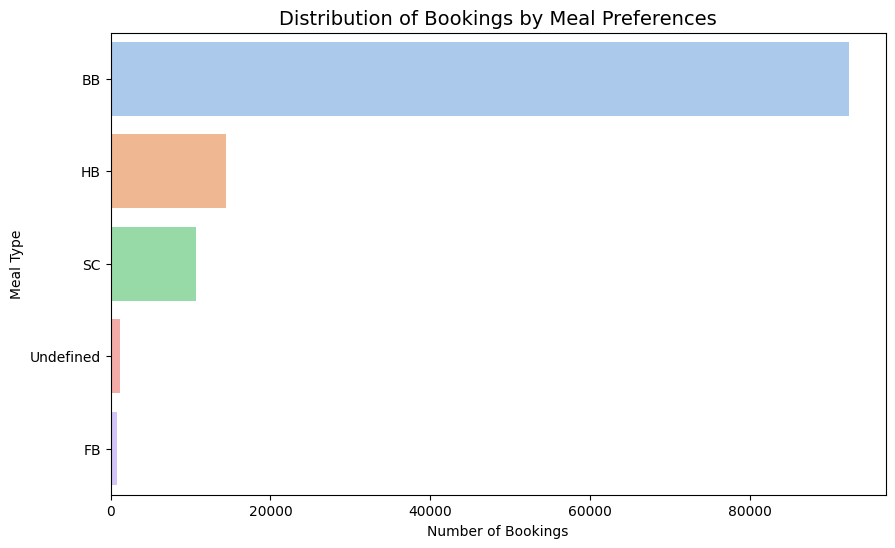

In [ ]:
##Distribution of Bookings by Meal Preferences
plt.figure(figsize=(10, 6))
meal_preferences = df['meal'].value_counts()
sns.barplot(x=meal_preferences.values, y=meal_preferences.index, palette='pastel')
plt.title('Distribution of Bookings by Meal Preferences', fontsize=14)
plt.xlabel('Number of Bookings')
plt.ylabel('Meal Type')
plt.show()